In [790]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [791]:
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
#optional settings:
# allows us to open the file in illustrator to edit stuff.
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12
data_path="../manuscript_data.xlsx"

In [792]:
# import data for general descriptive stats.
stat_data = pd.read_excel(data_path, sheet_name="covar_noash")
stat_data2 = pd.read_excel(data_path,sheet_name='covariation')
# Obtain general descriptive statistics of the dataset based on the locality column.
element_stats = stat_data.groupby('Locality').describe()
element_stats2 = stat_data2.groupby('Locality').describe()

# Export that information to an excel file.
element_stats.to_excel('../elements_stats.xlsx')

# add data to another sheet of the same excel file.
with pd.ExcelWriter("../elements_stats.xlsx",engine="openpyxl", mode='a', if_sheet_exists='overlay') as writer:
    element_stats2.to_excel(writer, sheet_name="with_ashes", index=True)

In [793]:
data = pd.read_excel("../manuscript_data.xlsx", sheet_name="covar_noash")
data.head(3)

,Locality,Lithology,sample,Hg,TOC,Al,Fe,V,Mo,U,U_Al,corr_Hg,corr_U
0,Shanggang,SHA,SHA 324 C+iso,15.9,0.453358,1.009523,0.851051,13.6,1.0,6.0,5.943401,15.9,6.0
1,Shanggang,SHA,SHA 325 C+iso,4.3,0.048060,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.1
2,Shanggang,SHA,SHA 506 iso,6.4,0.028917,NaN,NaN,NaN,NaN,NaN,NaN,5.3,3.1


In [794]:
sha_Hg = data[data['Locality']=='Shanggang']['Hg']
qia_Hg = data[data['Locality']=='Qiakong']['Hg']
ja_Hg = data[data['Locality']=='Jebel Aweri']['Hg']
wm_Hg = data[data['Locality']=='Wadi Musjah']['Hg']

sha_TOC = data[data['Locality']=='Shanggang']['TOC']
qia_TOC = data[data['Locality']=='Qiakong']['TOC']
ja_TOC = data[data['Locality']=='Jebel Aweri']['TOC']
wm_TOC = data[data['Locality']=='Wadi Musjah']['TOC']

sha_Al = data[data['Locality']=='Shanggang']['Al']
qia_Al = data[data['Locality']=='Qiakong']['Al']
ja_Al = data[data['Locality']=='Jebel Aweri']['Al']
wm_Al = data[data['Locality']=='Wadi Musjah']['Al']

sha_Fe = data[data['Locality']=='Shanggang']['Fe']
qia_Fe = data[data['Locality']=='Qiakong']['Fe']
ja_Fe = data[data['Locality']=='Jebel Aweri']['Fe']
wm_Fe = data[data['Locality']=='Wadi Musjah']['Fe']

sha_U = data[data['Locality']=='Shanggang']['U']
qia_U = data[data['Locality']=='Qiakong']['U']
ja_U = data[data['Locality']=='Jebel Aweri']['U']

sha_Mo = data[data['Locality']=='Shanggang']['Mo']
qia_Mo = data[data['Locality']=='Qiakong']['Mo']
ja_Mo = data[data['Locality']=='Jebel Aweri']['Mo']
wm_Mo = data[data['Locality']=='Wadi Musjah']['Mo']

In [795]:
y=[sha_Hg, qia_Hg, ja_Hg, wm_Hg]
x1=[sha_TOC, qia_TOC, ja_TOC, wm_TOC]
x2=[sha_Al, qia_Al, ja_Al, wm_Al]
x3 = [sha_Fe, qia_Fe, ja_Fe, wm_Fe]
x4 = [sha_U, qia_U, ja_U]
x5 = [sha_Mo, qia_Mo, ja_Mo, wm_Mo]

In [796]:
"""This function takes 2 inputs, x and y, and returns the corresponding rho and p values
calculated for the spearmans rank correlation function. x and y are lists of data for which this calculation is needed."""
from scipy.stats import spearmanr

def spearman(x, y):
    out = []
    for i in range(len(x)):
        rho, p = spearmanr(x[i], y[i], nan_policy='omit')
        result = rho, p
        out.append(result)
    df = pd.DataFrame(out, columns=['rho', 'p'])
    return df

U_correlation = spearman(x4,y)
U_correlation
# rho, p = spearmanr(qia_TOC,qia_Hg,nan_policy='omit')
# rho,p

,rho,p
0,0.574814,0.010040
1,0.651995,0.000229
2,-0.027587,0.935829


Calculate the Spearmans correlation coefficient for TOC, Al, Fe, V; and then export the results to different sheets of an existing excel file.

In [797]:
x_variable = [x1, x2, x3, x4, x5]
count=['TOC','Al', 'Fe', 'U', 'Mo']
for i in range(len(x_variable)):
    result = spearman(x_variable[i], y)
    # export the stats to multiple sheets in existing excel file
    with pd.ExcelWriter("../spearman.xlsx",engine="openpyxl", mode='a', if_sheet_exists='overlay') as writer:
        result.to_excel(writer, sheet_name=f"output{count[i]}", index=True)
    # print(result)
    

Summarize the data from sheet named "covar_noash" based on localities studied.

In [798]:
summary = data.groupby('Lithology').describe() 
# export the stats to multiple sheets in existing excel file
with pd.ExcelWriter("../summary.xlsx",engine="openpyxl", mode='a', if_sheet_exists='overlay') as writer:
    summary.to_excel(writer, sheet_name="covariation_summary", index=True)

Plot scatter plots of data including volcanic ash strata from all localities.

In [799]:
data = pd.read_excel("../manuscript_data.xlsx", sheet_name="covariation")
Hg = data["Hg"]
U = data['U']
corr_U = data['corr_U']
corr_Hg = data['corr_Hg']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.6798969340201223, 3.4330217754037647e-10)

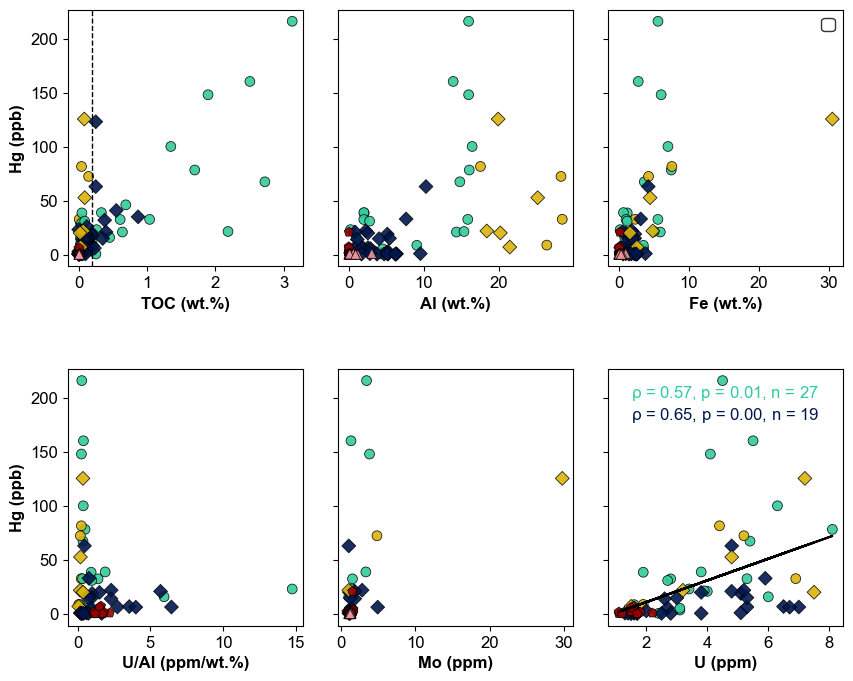

In [800]:
import scipy
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(figsize=(10, 8), nrows=2, ncols=3,
                                 sharey=True)
colors = ['#33cb9c', '#DBB40C', '#00164e', '#DBB40C', '#9b0000', '#ef959d']
markers = ['o','o', 'D','D', 'p','^']
fig.subplots_adjust(hspace=0.4, wspace=0.15)

#define the variables needed to iterably make the figures.
subs = ['TOC', 'Al', 'Fe', 'U_Al', 'Mo', 'U']
ax = [ax0, ax1, ax2, ax3, ax4, ax5]
xlabels = [ "TOC (wt.%)", "Al (wt.%)", "Fe (wt.%)","U/Al (ppm/wt.%)", "Mo (ppm)", "U (ppm)"]
text = r'$\rho$'
# make subplots using a for loop.
for ix, sub in enumerate(subs):
    sns.scatterplot(data=data, x=data[sub], y=Hg, ax=ax[ix],
                    color='black', edgecolor='black', legend=False,
                    s=50, hue='Lithology', palette=colors, alpha=0.9,
                    style='Lithology', markers=markers,
                    )
    ax[ix].tick_params(labelsize=12, color='black')
    ax[ix].set_xlabel(xlabels[ix], fontsize=12, color='black', fontweight='bold')
    ax[ix].set_ylabel("Hg (ppb)", fontsize=12, color = 'black', fontweight = 'bold')
ax0.axvline(x=0.2, linestyle='--', color='black', linewidth=1)
# ax0.annotate(f'SHA: {text} = 0.57, p = 0.00',(0.5,200))
ax2.legend(loc='upper right', edgecolor='black')

# Calculate the r2 and plot it.
# Remove nan values from x and y arrays
x = corr_U[~np.isnan(corr_U)]
y = corr_Hg[~np.isnan(corr_Hg)]

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(V, Hg)
result = scipy.stats.linregress(x, y)
ax5.plot(x, result.intercept+result.slope *
         x, 'k', label='fitted line')
r2 = abs(result.rvalue**2)
SHA_U_rho = U_correlation['rho'][0]
QIA_U_rho = U_correlation['rho'][1]
QIA_U_p = U_correlation['p'][1]
SHA_U_p = U_correlation['p'][0]
ax5.annotate(f'{text} = {SHA_U_rho:.2f}, p = {SHA_U_p:.2f}, n = 27',(1.5,200),color = '#33cb9c',
            fontsize=12,)
ax5.annotate(f'{text} = {QIA_U_rho:.2f}, p = {QIA_U_p:.2f}, n = 19',(1.5,180),color = '#00164e',
            fontsize=12,)

rho, p = spearmanr(x,y,nan_policy='omit')
rho,p

# plt.savefig("../plots/covariation.pdf")

In [801]:
df = pd.read_excel('../manuscript_data.xlsx', sheet_name="Nd_Sr")
df.head(2)

,Locality,sample,Sr,Sr_2se,Nd(t),Nd_2se,Nd143_144
0,Qiakong,Q130,0.708199,0.000057,-7.155361,0.133041,0.512169
1,Qiakong,Q133,0.708341,0.000026,-6.358442,0.076262,0.512210


In [802]:
data_path = "../SSB_literature_Hg_data.xlsx"
save_path = '../plots/'
iso = pd.read_excel(data_path, sheet_name="iso_data")
iso.head(3)


,Locality,Author,sample,d202Hg,D199Hg,D200Hg,D201Hg
0,Chaohu,Wang et al. 2019,CH26-1,-1.196602,0.163477,0.011747,0.034643
1,Chaohu,Wang et al. 2019,CH27-5,-1.438952,0.091963,0.030875,-0.031976
2,Chaohu,Wang et al. 2019,CH31-2,-0.887090,0.111021,0.024028,0.013100


In [803]:
markers2 = ['D', 'p', '*']
Sr=df.Sr
Nd=df["Nd(t)"]


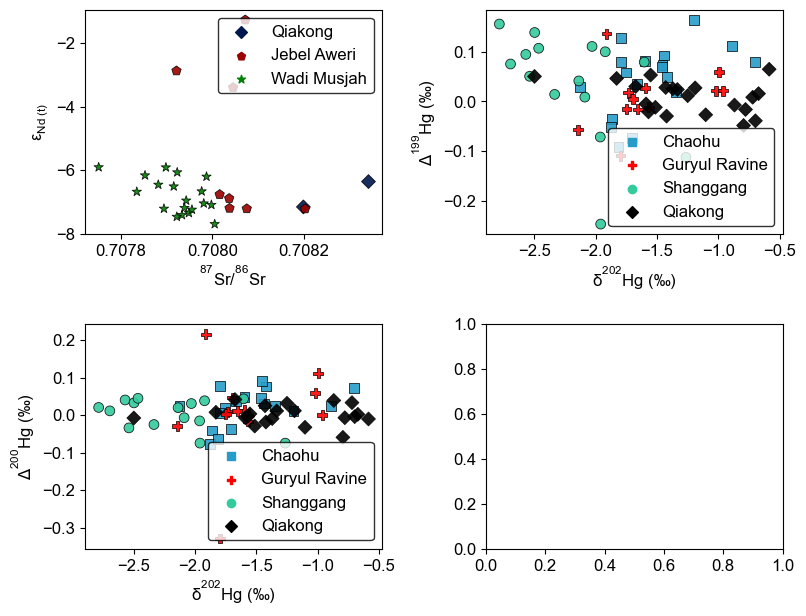

In [804]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(9, 7), sharey=False)
fig.subplots_adjust(hspace=0.4, wspace=0.35)
x_labels = [r"$^{87}Sr/^{86}Sr$", r"$\delta^{202}Hg\;(‰)$",]
y_labels = [r"$\epsilon_{Nd\;(t)}$", r"$\Delta^{199}Hg\;(‰)$", r"$\Delta^{200}Hg\;(‰)$"]
sub1_colors = [colors[2], colors[4], 'green']
sub2_colors = ["#289cc9", 'red', '#33cb9c', 'black']


def make_subplots(dataset, x, y, ax, colors, markers, x_label, y_label, location):
    sns.scatterplot(data=dataset, x=x, y=y, ax=ax,
                    color='black', edgecolor='black', legend=True,
                    s=50, hue='Locality', palette=colors, alpha=0.9,
                    style='Locality', markers=markers,
                    )
    ax.tick_params(labelsize=12)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.legend(loc=location, edgecolor='black', frameon=True,fontsize=12, ncol=1)

make_subplots(df, Sr, Nd, ax0, sub1_colors, markers2, x_labels[0], y_labels[0], "upper right")
make_subplots(iso, iso['d202Hg'], iso['D199Hg'], ax1, sub2_colors,
              ['s', 'P', 'o', 'D'], x_labels[1], y_labels[1], "lower right")
make_subplots(iso, iso['d202Hg'], iso['D200Hg'], ax2, sub2_colors,
              ['s', 'P', 'o', 'D'], x_labels[1], y_labels[2], "lower right")

# plt.savefig(f'{save_path}hg-iso_Nd-Sr.pdf', dpi=600)

Make RockEval plots


In [805]:
re = pd.read_excel("../manuscript_data.xlsx", sheet_name="rockeval")
re.head(3)

,Locality,sample,material,TOC,HI,OI,Tmax,Hg,preservation,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,QIA,Q7T,volcanic ash,0.088437,92.665496,640.808335,413.357143,52.7,not preserved,NaN,QIA,QIA 169 RV,black shale,0.54,38.0,67.0,456.0,NaN,preserved
1,QIA,Q9T,volcanic ash,0.066073,139.453189,1085.506394,358.285714,21.9,not preserved,NaN,QIA,QIA 168 RV,black shale,0.52,46.0,63.0,459.0,NaN,preserved
2,QIA,Q11T,volcanic ash,0.029723,172.119596,793.080057,375.214286,7.0,not preserved,NaN,QIA,QIA 167 RV,black shale,0.89,42.0,99.0,454.0,NaN,preserved


In [806]:
TOC = re['TOC']
HI = re.HI
OI = re.OI
Hg = re.Hg
Tmax = re.Tmax

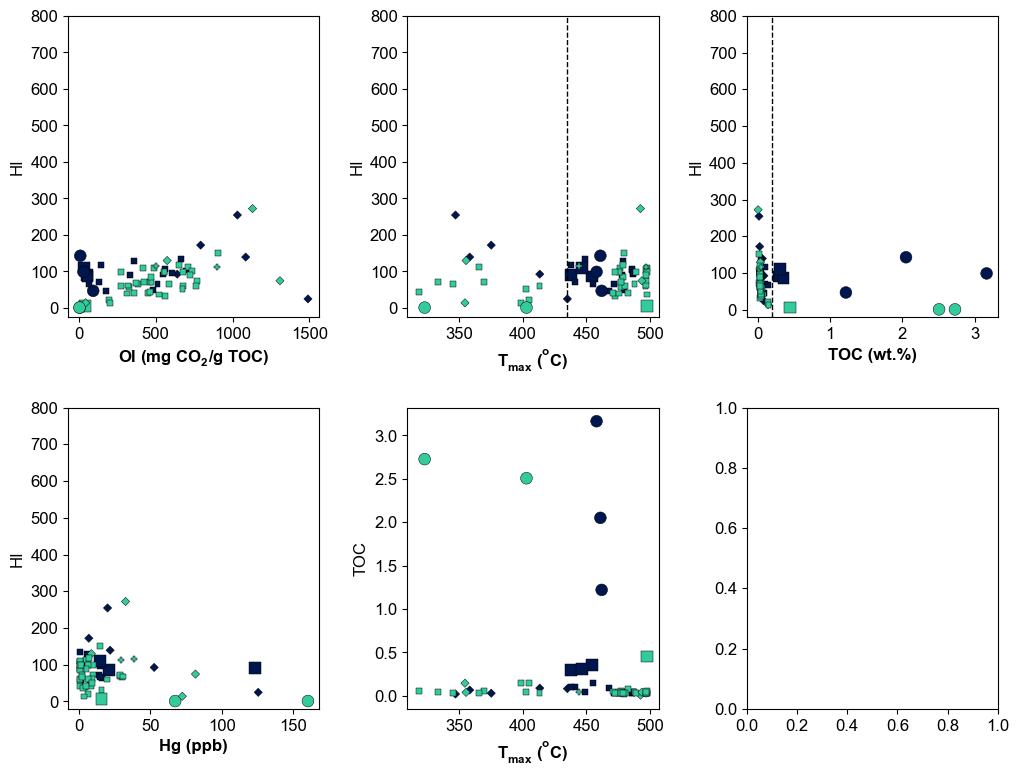

In [807]:
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize =(12, 9))
((ax0, ax1, ax2), (ax3, ax4, ax5)) = axes
fig.subplots_adjust(hspace=0.3, wspace=0.35)

x = [OI, Tmax, TOC, Hg, Tmax]
y = [HI, HI, HI, HI, TOC]
axes = [ax0, ax1, ax2, ax3, ax4, ax5]
xlabels = [r"OI (mg $CO_{2}/g$ TOC)", r"$T_{max}\;(^{o}C)$",
           "TOC (wt.%)", "Hg (ppb)", r"$T_{max}\;(^{o}C)$"]


def plot_data(x, y, axes):
    for i in range(len(x)):
        sns.scatterplot(x=x[i], y=y[i], ax=axes[i], color="black", edgecolor="black",
                        alpha=1, data=re, legend=False, hue='Locality', palette=['#00164e', '#33cb9c'],
                        markers=['D', 's', 'o', 'P'], style='material', size="preservation", 
                        size_order=["preserved", "not preserved"]
                        )
        axes[i].set_xlabel(xlabels[i], fontweight="bold", color='black')
        axes[i].tick_params(color='black')
        # ax2.legend(fontsize=10, loc = 'upper right',edgecolor='black', title="Legend", ncols=2)
    ax0.set_ylim(-25, 800)
    ax1.set_ylim(-25, 800)
    ax2.set_ylim(-20, 800)
    ax3.set_ylim(-20, 800)
    ax1.axvline(x=435,  linestyle='--', color='black', linewidth=1)
    ax2.axvline(x=0.2,  linestyle='--', color='black', linewidth=1)

plot_data(x, y, axes)

# plt.savefig("../plots/OM_type.pdf")